#### Import the necessary datasets. 

In [80]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

#### load the iris dataset

In [31]:
data = load_iris()

#### display the dataset keys

In [32]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

#### print the target_names

In [33]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
print('The description of the dataset:', data['DESCR'])

The description of the dataset: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ===

In [35]:
print('The different feature names for the iris dataset:', data['feature_names'])

The different feature names for the iris dataset: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### Create a dataframe with the input features and the corresponding target

In [83]:
#lets create a dataframe from the data and the target
iris_df = pd.DataFrame(data['data'], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [84]:
iris_df['target'] = data['target']

#### Based on the sepal length, sepal width, petal length & petal width, the requirement is to classify the type of iris flower

In [85]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [86]:
print('The shape of the iris dataset:', iris_df.shape)

The shape of the iris dataset: (150, 5)


In [87]:
print('The various datatypes of the iris dataset')
iris_df.dtypes

The various datatypes of the iris dataset


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int32
dtype: object

#### Display the details about the file

In [88]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


#### Check for any null values

In [89]:
iris_df.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
target          False
dtype: bool

There are no null values present in the dataset.

#### check for the presence of any duplicate values

In [90]:
iris_df.duplicated().sum()

1

In [91]:
iris_df[iris_df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,target
142,5.8,2.7,5.1,1.9,2


It looks like we have one duplicated records.

In [92]:
#Let's remove the duplicate record
iris_df.drop_duplicates(subset=None, keep='first', inplace=True)

#### Display the descriptive statistics of the data

In [93]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631,0.993289
std,0.830851,0.436342,1.767791,0.762622,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [94]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

#### Display the count of the target using countplot and see whether the dataset is balanced

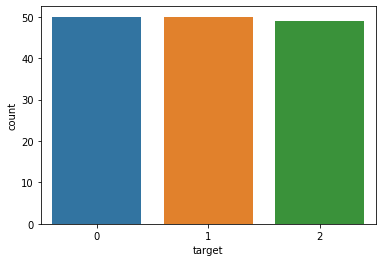

In [95]:
sns.countplot(iris_df['target'])

Since it is an internal dataset, all the classes are equally spread

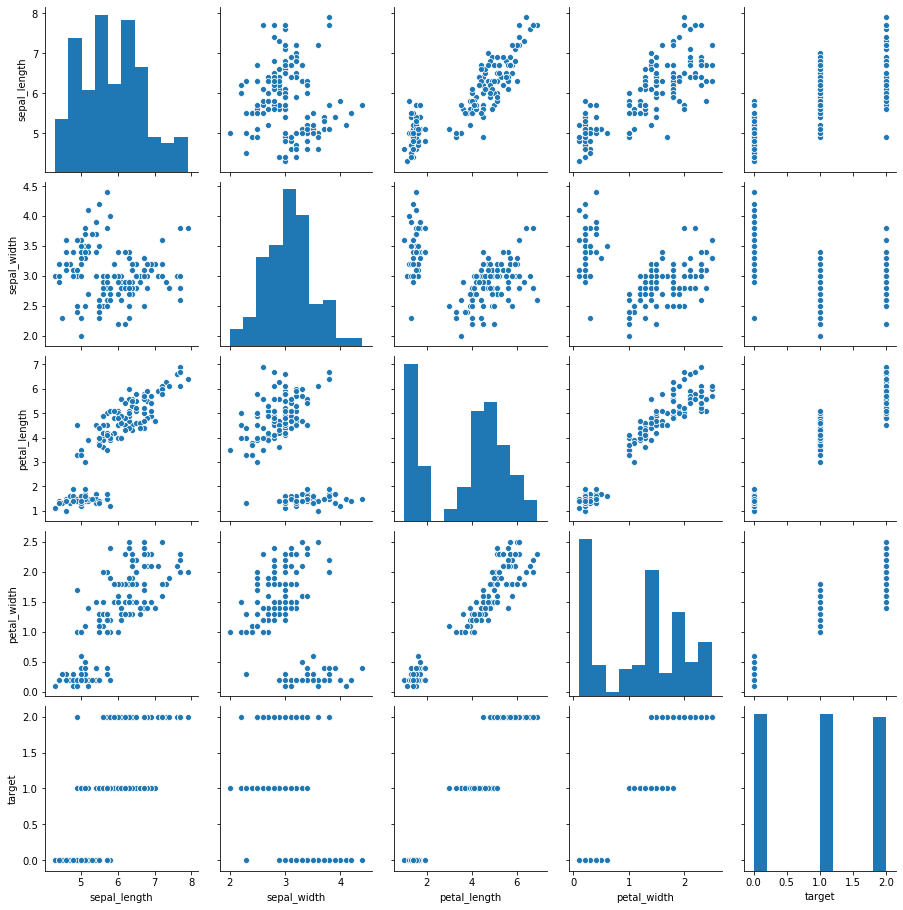

In [96]:
sns.pairplot(iris_df)

From a quick glance of the above plot, we can say 'petal width' & 'petal length' are strongly correlated.

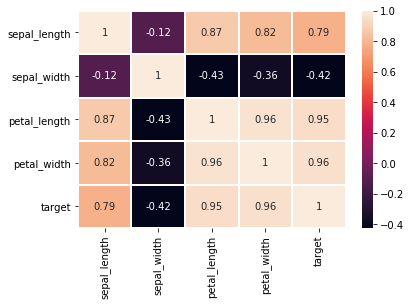

In [97]:
#use pearson correaltion coefficient
sns.heatmap(iris_df.corr(), annot=True, linewidth=1)

Observations: 
Except sepal widht(cm) most of the variables are strongly correlated with one another. We will try with different variables as input to see the impact. 

### Use one-way anova test 

In [98]:
anova_result = pd.DataFrame([])

obj_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
num_cols = ['target']

#applying anova test for continuous variable and discrete variables
for i in num_cols:
    for j in obj_cols:        
        model = ols(i+' ~ C('+j+')', iris_df).fit()
        anova_result.loc[i,j] = sm.stats.anova_lm(model,typ=1).iloc[0]['PR(>F)']
        
anova_result

,sepal_length,sepal_width,petal_length,petal_width
target,5.215051e-19,0.000327,9.703469e-54,1.602348e-73


All the variables have good correlation with the target as the probability(area) value is very less.

### split the data into input predictors and target variables.

In [349]:
X = iris_df.drop(['target'], axis=1)
y = iris_df['target']

### split the dataset into train & test.

In [350]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=200)

In [351]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [352]:
knn_classifier.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [353]:
predict = knn_classifier.predict(test_x)

In [354]:
predict

array([1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 1,
       2, 0, 0, 0, 1, 2, 2, 1])

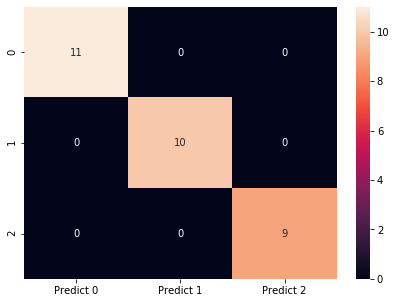

In [355]:
#print confusion matrix
cm = confusion_matrix(test_y,predict, labels = [0,1,2])
df = pd.DataFrame(cm , index = ["0","1","2"],
                  columns = ["Predict 0","Predict 1","Predict 2"])
plt.figure(figsize = (7,5))
sns.heatmap(df,annot= True)

In [356]:
accuracy_df = pd.DataFrame([], columns=['accuracy_score', 'Precision', 'Recall', 'f1_score'])

In [357]:
accuracy_df.loc['k=5','accuracy_score'] = accuracy_score(test_y, predict)
accuracy_df.loc['k=5','Precision'] = precision_score(test_y, predict, average='weighted')
accuracy_df.loc['k=5','Recall'] = recall_score(test_y, predict, average='weighted')
accuracy_df.loc['k=5','f1_score'] = f1_score(test_y, predict, average='weighted')

#### Excecution 2

In [358]:
knn_classifier = KNeighborsClassifier(n_neighbors=91)

In [359]:
knn_classifier.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=91, p=2,
                     weights='uniform')

In [360]:
predict = knn_classifier.predict(test_x)

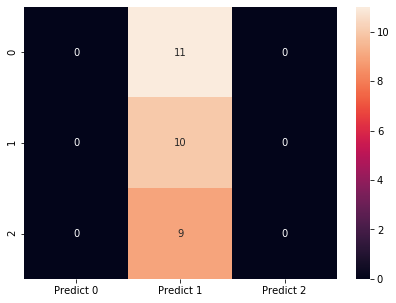

In [361]:
#print confusion matrix
cm = confusion_matrix(test_y,predict, labels = [0,1,2])
df = pd.DataFrame(cm , index = ["0","1","2"],
                  columns = ["Predict 0","Predict 1","Predict 2"])
plt.figure(figsize = (7,5))
sns.heatmap(df,annot= True)

In [362]:
accuracy_df.loc['k=91','accuracy_score'] = accuracy_score(test_y, predict)
accuracy_df.loc['k=91','Precision'] = precision_score(test_y, predict, average='weighted')
accuracy_df.loc['k=91','Recall'] = recall_score(test_y, predict, average='weighted')
accuracy_df.loc['k=91','f1_score'] = f1_score(test_y, predict, average='weighted')

C:\Users\91965\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Execution 3

#### Let's drop 3 input predictors and retaining only one 'petal_width' and check whether we are able to classify accurately

In [363]:
X = iris_df.drop(['target', 'petal_length', 'sepal_length', 'sepal_width'], axis=1)
y = iris_df['target']

In [364]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=200)

In [365]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [366]:
knn_classifier.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [367]:
predict = knn_classifier.predict(test_x)

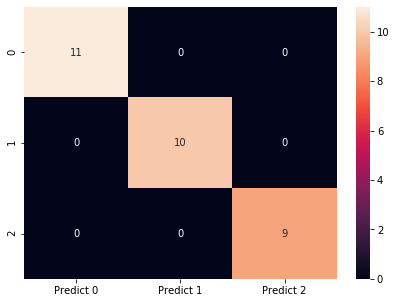

In [368]:
#print confusion matrix
cm = confusion_matrix(test_y,predict, labels = [0,1,2])
df = pd.DataFrame(cm , index = ["0","1","2"],
                  columns = ["Predict 0","Predict 1","Predict 2"])
plt.figure(figsize = (7,5))
sns.heatmap(df,annot= True)

In [369]:
accuracy_df.loc['Single_Predictor','accuracy_score'] = accuracy_score(test_y, predict)
accuracy_df.loc['Single_Predictor','Precision'] = precision_score(test_y, predict, average='weighted')
accuracy_df.loc['Single_Predictor','Recall'] = recall_score(test_y, predict, average='weighted')
accuracy_df.loc['Single_Predictor','f1_score'] = f1_score(test_y, predict, average='weighted')

In [370]:
accuracy_df

,accuracy_score,Precision,Recall,f1_score
k=5,1,1,1,1
k=91,0.333333,0.111111,0.333333,0.166667
Single_Predictor,1,1,1,1
